# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [2]:
ls -lt *.csv

 Volume in drive C has no label.
 Volume Serial Number is 26FC-B320

 Directory of C:\Data_Science\FlatIron_DS_Bootcamp\Course_Material\mod1section05\Labs\dsc-data-cleaning-project-online-ds-pt-061019


 Directory of C:\Data_Science\FlatIron_DS_Bootcamp\Course_Material\mod1section05\Labs\dsc-data-cleaning-project-online-ds-pt-061019

06/24/2019  09:42 PM            49,195 heroes_information.csv
06/24/2019  09:42 PM           672,305 super_hero_powers.csv
               2 File(s)        721,500 bytes
               0 Dir(s)  157,503,135,744 bytes free


In [3]:
heroes_df = pd.read_csv("./heroes_information.csv")
powers_df = pd.read_csv("./super_hero_powers.csv")

In [4]:
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [5]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [6]:
heroes_df.drop("Unnamed: 0", axis=1, inplace=True) # Drop columns = (axis=1)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [7]:
# Descriptive statistics of heroes_df DataFrame ()

In [8]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB


#### Comment:
The Weight and Publisher columns contain null values. Student should replace null values in Weight column with mean or median value for this column. Since Publisher is a categorical column, having null values here is not necessarily a blocking problem. We can either remove those rows (not desirable, because those rows might be interesting, and we should never throw away data when we can help it), we can leave them as is, or, since it is only 15 values, we could always look it up manually and fill in the correct values. This is not expected for this lab, but would be a good solution if this data was important in a real-world project.

In [9]:
heroes_df.describe()

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


In [10]:
heroes_df.head(100)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0
6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0
7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0
8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0
9,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0


In [11]:
# # Descriptive statistics of powers_df DataFrame ()

In [12]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


In [13]:
powers_df.shape

(667, 168)

In [14]:
powers_df.describe()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Star-Lord,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [15]:
# Check for null values in each dataframe

In [16]:
heroes_df.isna().any()

name          False
Gender        False
Eye color     False
Race          False
Hair color    False
Height        False
Publisher      True
Skin color    False
Alignment     False
Weight         True
dtype: bool

In [17]:
# Comment:
# The Weight and Publisher columns contain null values.

In [18]:
# How many null values are in heroes_df?
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [19]:
# Update heroes_df to fill-in value for Weight with the mean value:
mean_weight = heroes_df.Weight.mean()
heroes_df['Weight'].fillna(mean_weight, inplace=True)
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         0
dtype: int64

In [20]:
heroes_df_nan_Publisher = heroes_df[heroes_df["Publisher"].isnull()]  # Use isnull() to find NaN values in dataframe rows.
heroes_df_nan_Publisher

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
46,Astro Boy,Male,brown,-,Black,-99.0,NaN,-,good,-99.000000
86,Bionic Woman,Female,blue,Cyborg,Black,-99.0,NaN,-,good,-99.000000
138,Brundlefly,Male,-,Mutant,-,193.0,NaN,-,-,-99.000000
175,Chuck Norris,Male,-,-,-,178.0,NaN,-,good,-99.000000
204,Darkside,-,-,-,-,-99.0,NaN,-,bad,-99.000000
244,Ethan Hunt,Male,brown,Human,Brown,168.0,NaN,-,good,-99.000000
263,Flash Gordon,Male,-,-,-,-99.0,NaN,-,good,-99.000000
286,Godzilla,-,-,Kaiju,-,108.0,NaN,grey,bad,43.855191
348,Jack Bauer,Male,-,-,-,-99.0,NaN,-,good,-99.000000
354,Jason Bourne,Male,-,Human,-,-99.0,NaN,-,good,-99.000000


In [21]:
heroes_df_nan_Publisher.shape

(15, 10)

In [32]:
# Update the Publisher columns with NaN values to Unknown
# heroes_df["Publisher"] = "Unknown"

In [23]:
heroes_df.isna()

name          False
Gender        False
Eye color     False
Race          False
Hair color    False
Height        False
Publisher      True
Skin color    False
Alignment     False
Weight        False
dtype: bool

In [33]:
heroes_df.head(100)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0
6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0
7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0
8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0
9,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0


In [25]:
powers_df.isna().any()

hero_names               False
Agility                  False
Accelerated Healing      False
Lantern Power Ring       False
Dimensional Awareness    False
Cold Resistance          False
Durability               False
Stealth                  False
Energy Absorption        False
Flight                   False
Danger Sense             False
Underwater breathing     False
Marksmanship             False
Weapons Master           False
Power Augmentation       False
Animal Attributes        False
Longevity                False
Intelligence             False
Super Strength           False
Cryokinesis              False
Telepathy                False
Energy Armor             False
Energy Blasts            False
Duplication              False
Size Changing            False
Density Control          False
Stamina                  False
Astral Travel            False
Audio Control            False
Dexterity                False
                         ...  
Intuitive aptitude       False
Vision -

In [26]:
# Let's check if any of these are True, rather than reading them all, by 
# just chaining another call to .any()
powers_df.isna().any().any()

False

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [34]:
# Drop duplicate names
heroes_df.drop_duplicates(subset="name", inplace=True)
# Reset index values
heroes_df.reset_index(drop=True, inplace=True)
powers_df.rename(columns={'hero_names':'name'}, inplace=True)
powers_df  = powers_df.astype('str')
heroes_and_powers_df = powers_df.set_index('name').join(heroes_df.set_index('name'), how='inner')
heroes_and_powers_df.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Omniscient,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
Abraxas,False,False,False,True,False,False,False,False,True,False,...,False,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [37]:
heroes_and_powers_df.columns

Index(['Agility', 'Accelerated Healing', 'Lantern Power Ring',
       'Dimensional Awareness', 'Cold Resistance', 'Durability', 'Stealth',
       'Energy Absorption', 'Flight', 'Danger Sense',
       ...
       'Omniscient', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height',
       'Publisher', 'Skin color', 'Alignment', 'Weight'],
      dtype='object', length=176)

In [38]:
heroes_and_powers_df["Gender"].unique()

array(['Male', 'Female', '-'], dtype=object)

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [39]:
male_heroes_df = heroes_and_powers_df[heroes_and_powers_df["Gender"] == "Male"]
female_heroes_df = heroes_and_powers_df[heroes_and_powers_df["Gender"] == "Female"]

In [40]:
male_heroes_df.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Omniscient,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
Abraxas,False,False,False,True,False,False,False,False,True,False,...,False,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [41]:
female_heroes_df.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Omniscient,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,,,,,,,,,,,,,
Angel Dust,True,False,False,False,False,False,False,False,False,False,...,False,Female,yellow,Mutant,Black,165.0,Marvel Comics,-,good,57.0
Angel Salvadore,False,False,False,False,False,False,False,False,True,False,...,False,Female,brown,-,Black,163.0,Marvel Comics,-,good,54.0
Angela,False,False,False,False,False,False,False,False,False,False,...,False,Female,-,-,-,-99.0,Image Comics,-,bad,-99.0
Arachne,True,True,False,False,False,True,False,False,False,False,...,False,Female,blue,Human,Blond,175.0,Marvel Comics,-,good,63.0
Arclight,False,False,False,False,False,True,False,False,False,False,...,False,Female,violet,-,Purple,173.0,Marvel Comics,-,bad,57.0


In [44]:
figure = plt.figure(figsize=(10,5))
# ax1 = figure.add_subplot(121)
# ax2 = figure.add_subplot(122)

# ax1 = male_heroes_df.plot.scatter(x="Height", y="Weight", c="k", label="Male")


# Plotting data
fig = plt.figure(figsize=(12,8))
#X = np.arange(len(df_auto))
# plt.bar(X + 0.00,df_auto["Origin"], df_auto["Student"], width=0.4);
# plt.bar(X + 0.25,df_auto["Origin"], df_auto["Staff"], width = 0.4, color = "red");

plt.bar(df_auto["Origin"], df_auto["Student"], width=0.4);
plt.bar(df_auto["Origin"], df_auto["Staff"], width = 0.4, color = "red");


fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,1,1)
labels = df["Response Category"]
ax1= plt.pie(df["Frequency"], labels=labels, autopct='%1.1f%%', shadow=True, startangle=140);
plt.legend(labels, loc="best")
plt.title("Pie Chart")
plt.axis('equal')
plt.tight_layout()
plt.show()

<Figure size 720x360 with 0 Axes>

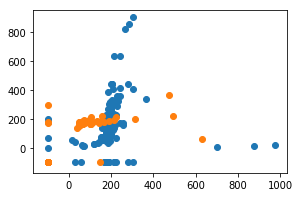

In [70]:
# Plotting data
fig = plt.figure(figsize=(10,3))

ax1 = plt.subplot(1,2,1)  # (row, col, idx)
#ax2 = plt.subplot(1,2,2)  # (row, col, idx)

ax1 = plt.scatter(male_heroes_df["Height"], male_heroes_df["Weight"])
ax1 = plt.scatter(female_heroes_df["Weight"], female_heroes_df["Height"])


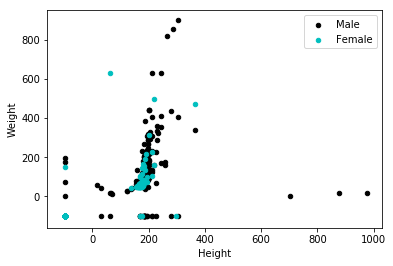

In [71]:
ax = male_heroes_df.plot.scatter(x="Height", y="Weight", c="k", label="Male")
female_heroes_df.plot.scatter(x="Height", y="Weight", c="c", label="Female", ax=ax)

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [75]:
male_heroes_df = heroes_df[heroes_df['Gender'] == 'Male']
female_heroes_df = heroes_df[heroes_df['Gender'] == 'Female']

def show_distplot(dataframe, gender, column_name):
    plt.plot()
    dataframe[column_name].hist()
    plt.title("Distribution of {} for {} heroes".format(column_name, gender))
    plt.xlabel(column_name)
    plt.ylabel("Probability Density")
    plt.show()

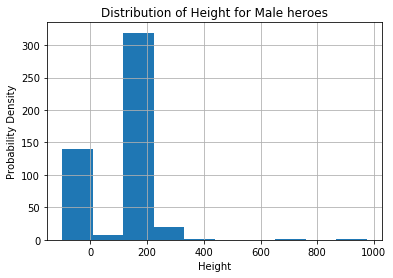

Mean height for male heroes: 109.11201629327903
Median height for male heroes: 180.0


In [76]:
# Male Height
show_distplot(male_heroes_df, 'Male', 'Height')
print("Mean height for male heroes: {}".format(male_heroes_df.Height.mean()))
print("Median height for male heroes: {}".format(male_heroes_df.Height.median()))


# Comments:
# Mean height for male heroes: 109.11201629327903
# Median height for male heroes: 180.0

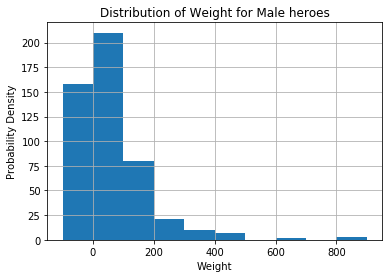

Mean weight for male heroes: 53.519053342681936
Median weight for male heroes: 79.0


In [77]:
# Male Weight
show_distplot(male_heroes_df, 'Male', 'Weight')
print("Mean weight for male heroes: {}".format(male_heroes_df.Weight.mean()))
print("Median weight for male heroes: {}".format(male_heroes_df.Weight.median()))

# Comments:
# Mean weight for male heroes: 53.519053342681936
# Median weight for male heroes: 79.0


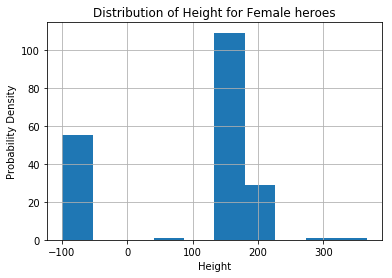

Mean height for female heroes: 97.99234693877551
Median height for female heroes: 168.0


In [78]:
# Female Height
show_distplot(female_heroes_df, 'Female', 'Height')
print("Mean height for female heroes: {}".format(female_heroes_df.Height.mean()))
print("Median height for female heroes: {}".format(female_heroes_df.Height.median()))


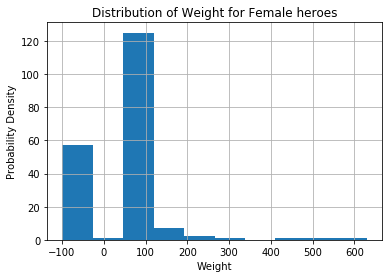

Mean weight for female heroes: 27.433673469387756
Median weight for female heroes: 79.0


In [79]:
# Female Weight
show_distplot(female_heroes_df, 'Female', 'Weight')
print("Mean weight for female heroes: {}".format(female_heroes_df.Weight.mean()))
print("Median weight for female heroes: {}".format(male_heroes_df.Weight.median()))


Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:
____________________________________________________________________________________________________________________________



__Comments:__

Outliers that fall below 0 for the height and weight. Further investigation demonstrates that all heights and weights below zero are set to -99, which suggests that these may have originally been missing values which were filled with an erroneous value. This investigation and subsequent plots with these values removed is demonstrated below.

In [80]:
print('Top Negative Heights:')
print(heroes_df[heroes_df.Height < 0].Height.value_counts())

print('Top Negative Weights:')
print(heroes_df[heroes_df.Weight < 0].Weight.value_counts())

Top Negative Heights:
-99.0    209
Name: Height, dtype: int64
Top Negative Weights:
-99.0    229
Name: Weight, dtype: int64


In [81]:
print('Top Negative Heights:')
print(heroes_df[heroes_df.Height < 0].Height.value_counts())

print('Top Negative Weights:')
print(heroes_df[heroes_df.Weight < 0].Weight.value_counts())

Top Negative Heights:
-99.0    209
Name: Height, dtype: int64
Top Negative Weights:
-99.0    229
Name: Weight, dtype: int64


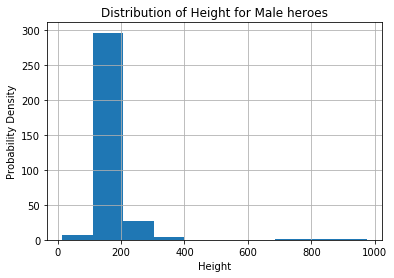

Mean Height for Male heroes: 192.62314540059347
Median Height for Male heroes: 185.0


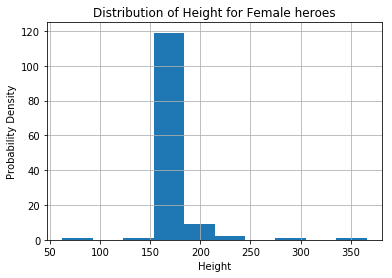

Mean Height for Female heroes: 174.90671641791045
Median Height for Female heroes: 170.0


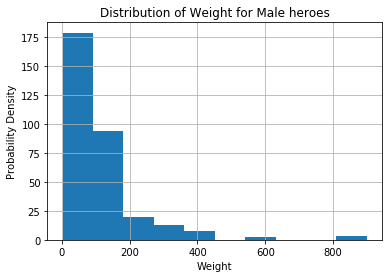

Mean Weight for Male heroes: 126.84594103842267
Median Weight for Male heroes: 90.0


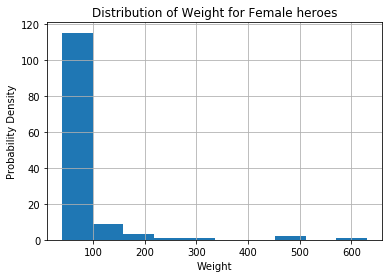

Mean Weight for Female heroes: 80.34848484848484
Median Weight for Female heroes: 57.5


In [82]:
for feat in ['Height', 'Weight']:
    df = heroes_and_powers_df[heroes_and_powers_df[feat]>0] #Temporarily remove negatives
    for group in ['Male', 'Female']:
        show_distplot(df[df['Gender']==group], group, feat)
        print("Mean {} for {} heroes: {}".format(feat, group, df[df['Gender']==group][feat].mean()))
        print("Median {} for {} heroes: {}".format(feat, group, df[df['Gender']==group][feat].median()))

__Final comment:__

All distributions now display a normal distribution, as would be expected for heights and weights of a random population.

### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data